# 단순 선형회귀 - 당뇨병 사례

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

- 당뇨병 데이터 셋

In [4]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [5]:
df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [7]:
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


- 당뇨병(target) VS BMI

In [24]:
X = df[['bmi']]
y = df['target']

- 1) 모든 X,y 데이터

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [26]:
lr.fit(X,y)

LinearRegression()

In [27]:
weight, bias = lr.coef_[0],lr.intercept_
rss = lr._residues
weight,bias,rss

(949.4352603839491, 152.1334841628967, 1719581.810773882)

In [32]:
lr.score(X,y)

0.3439237602253803

In [34]:
fp1 = np.polyfit(df.,df.Son, 1) # 1차식으로 아버지와 아들의 키 앞
fp1 

AttributeError: 'DataFrame' object has no attribute 'Father'

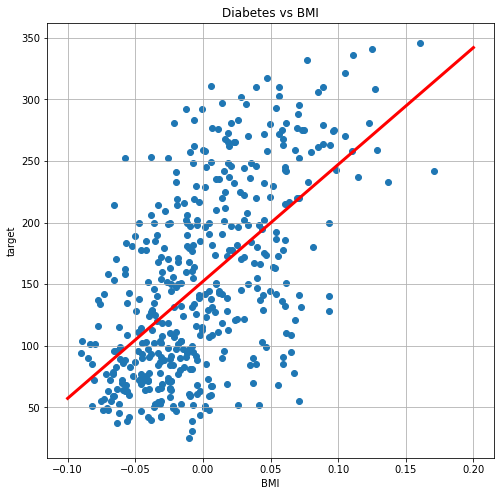

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(df.bmi,df.target)
plt.plot([-0.1,0.2],[-0.1*weight+bias,0.2*weight+bias],'r-',lw=3)
plt.grid()
plt.xlabel("BMI")
plt.ylabel("target")
plt.title('Diabetes vs BMI')
plt.show()

- 2) train/test dataset 분리,test_size = 0.1

In [39]:
from sklearn.model_selection import train_test_split


In [101]:
X_train,X_test,y_train,y_test = train_test_split(
 X,y, test_size=0.2, random_state=2021
)

In [102]:
lr2 = LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression()

In [103]:
pred = lr2.predict(X_test)

In [104]:
from sklearn.metrics import r2_score

In [132]:
lr2.score(X,y)

0.19210567163140935

In [108]:
from sklearn.metrics import mean_squared_error

In [74]:
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse) # Root mean squared error
mse,rmse

(3968.8854795822094, 62.99909110123899)

- 당뇨병 vs BP  

In [110]:
X = df[['bp']]
y = df['target']

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [112]:
lr.fit(X,y)

LinearRegression()

In [115]:
coef, intercept = lr.coef_[0],lr.intercept_
rss = lr._residues
coef,intercept,rss

(714.7416437042881, 152.13348416289585, 2110153.507189273)

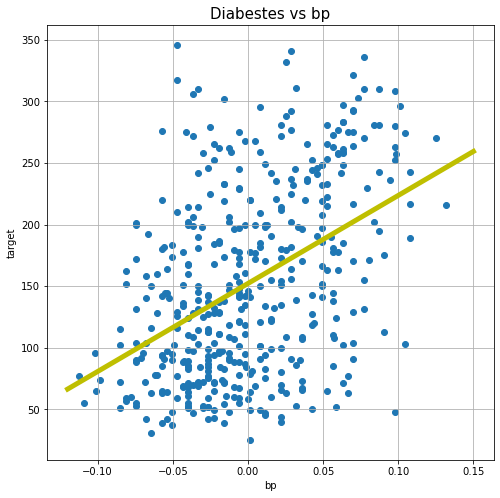

In [136]:
plt.figure(figsize=(8,8))
plt.scatter(df.bp,df.target)
plt.plot([-0.12,0.15],[-0.12*coef+intercept,0.15*coef+intercept],'y-',lw=5)
plt.grid()
plt.xlabel("bp")
plt.ylabel("target")
plt.title('Diabestes vs bp',fontsize=15)
plt.show()

In [129]:
lr.score(X,y)

0.19490798886682947